# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---


## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [2]:
# Step 0: Uploading the file to Google Colab
from google.colab import files
uploaded = files.upload()

# Step 1: Importing the required library
import pandas as pd  # pandas is used for data manipulation and analysis

# Step 2: Loading the dataset (after upload)
data = pd.read_csv("insurance.csv")  # Reads the uploaded CSV file into a DataFrame called 'data'

# Step 3: Displaying the first five rows
print("First 5 rows of the dataset:")
print(data.head())  # Shows the first 5 rows to understand the structure of the data

# Step 4: Checking column names and data types
print("\nColumn names and data types:")
print(data.info())  # Gives a concise summary of the DataFrame

# Step 5: Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())  # Returns the number of missing values in each column


Saving insurance.csv to insurance.csv
First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [3]:
# Step 6: Check again after dropping

data_cleaned = data.dropna()
print("\nMissing values after dropping:")
print(data_cleaned.isnull().sum())


# Step 7: Check for duplicate rows
duplicate_count = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


# Step 8: Drop duplicate rows if any
data_cleaned = data_cleaned.drop_duplicates()

# Step 9: Final shape after cleaning
print("\nShape of dataset after handling missing values and duplicates:")
print(data_cleaned.shape)


Missing values after dropping:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicate rows: 1

Shape of dataset after handling missing values and duplicates:
(1337, 7)


## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


Numerical columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


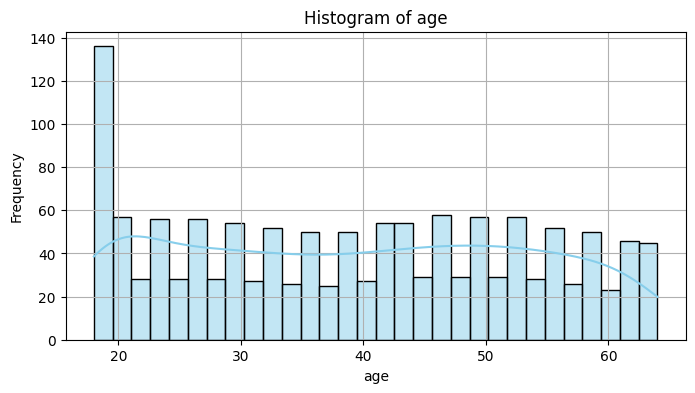

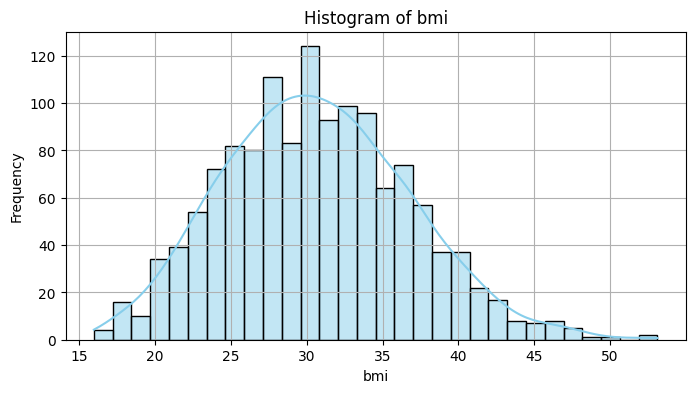

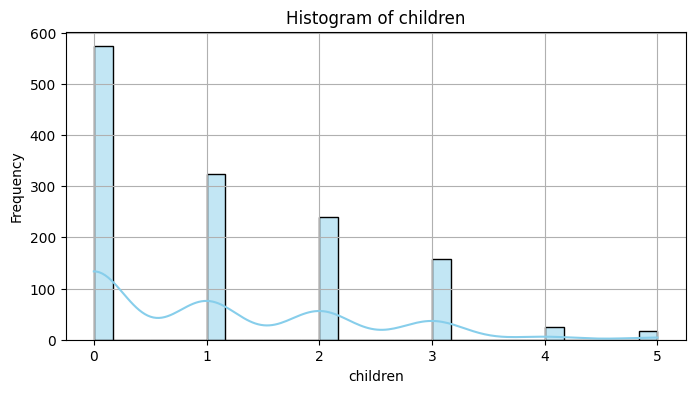

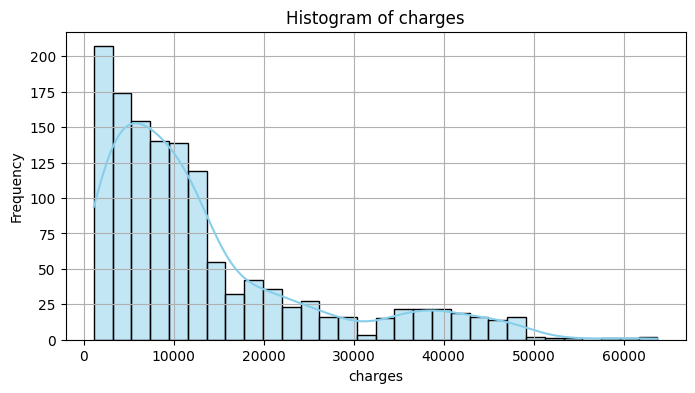

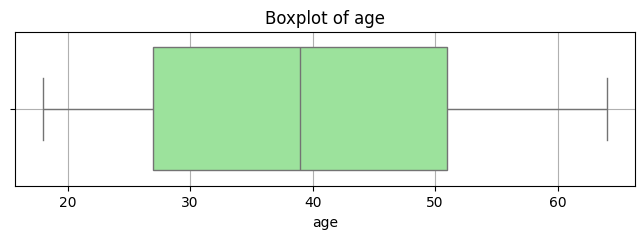

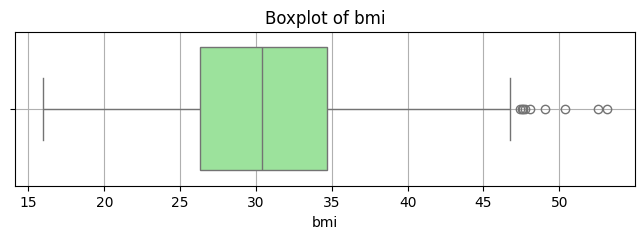

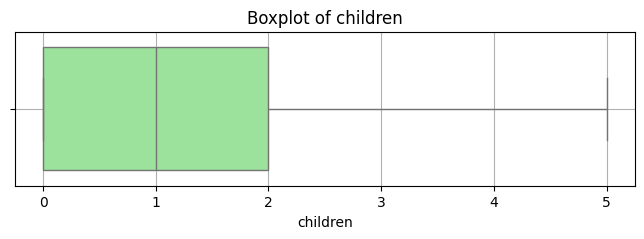

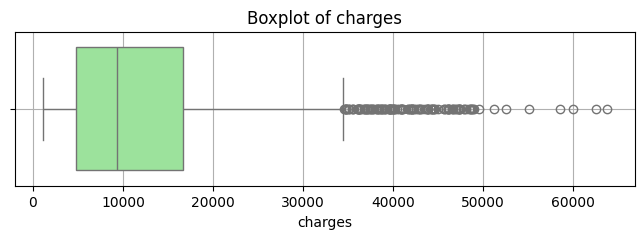

In [4]:
#  Step 10: Import required libraries
import matplotlib.pyplot as plt  # Used to create all types of plots (line, bar, histograms, etc.)
import seaborn as sns           # Built on top of matplotlib, used for more advanced and beautiful statistical plots

# This ensures plots display inside the notebook (only needed in Jupyter/Colab)
%matplotlib inline

#  Step 11: Select numerical columns from the cleaned dataset
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

#  Step 12a: Plot Histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Set the size of each histogram
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='skyblue')  # Histogram with KDE line
    plt.title(f"Histogram of {col}")  # Set plot title
    plt.xlabel(col)  # X-axis label = column name
    plt.ylabel("Frequency")  # Y-axis shows frequency
    plt.grid(True)  # Add gridlines
    plt.show()  # Display the plot

    #  Step 12b: Plot Boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 2))  # Set a wider, shorter boxplot
    sns.boxplot(x=data_cleaned[col], color='lightgreen')  # Boxplot with chosen color
    plt.title(f"Boxplot of {col}")  # Set plot title
    plt.grid(True)  # Add gridlines
    plt.show()  # Display the plot




Age Distribution (Histogram) – Summary
The histogram shows the distribution of age from 18 to 64 years.

Most ages are evenly represented, especially between 20 to 64 – this suggests a uniform distribution.

There's a clear spike at age 18, where the frequency is almost 3x higher than any other age group.

This spike may indicate a data generation issue or sampling bias – something to note during analysis.

The distribution has no gaps or extreme outliers.

There is no visible skewness – the data is fairly symmetric apart from the peak.

Since age is continuous and well-distributed, it's a good feature for regression modeling.

BMI Distribution (Histogram) – Summary
The histogram displays the distribution of Body Mass Index (BMI) values ranging from approximately 15 to 53.

Most BMI values are concentrated between 25 and 35, forming a bell-shaped curve with a peak around BMI = 30.

The distribution is slightly right-skewed due to a few individuals having very high BMI (above 45), which may be considered outliers.

Despite the skew, the majority of data is clustered around the center, showing a near-normal distribution.

There are no visible gaps in the distribution, and the overall spread of values is smooth and continuous.

This pattern suggests that BMI is a continuous and informative feature, making it suitable for regression modeling.

Children Distribution (Histogram) – Summary
The histogram shows the number of children per individual, ranging from 0 to 5.

The highest frequency is observed at 0 children, with over 550 individuals, indicating most people in the dataset have no children.

The frequency decreases as the number of children increases, showing a clear downward trend.

Very few individuals have 4 or 5 children, making those categories rare.

The distribution is right-skewed, concentrated towards lower values (0 to 2 children), with a long tail to the right.

This variable is discrete (not continuous) but still useful for regression, as it captures important demographic information.

The data does not contain any anomalies or gaps, but the imbalance in distribution should be noted during modeling.

Charges Distribution (Histogram) – Summary
The histogram shows the distribution of insurance charges ranging from near 0 up to over 60,000.

A large number of individuals have charges below ₹10,000, indicating many pay low insurance costs.

As charges increase, the number of individuals in each range steadily decreases, forming a long tail towards higher values.

There are some smaller peaks in higher charge ranges (around ₹40,000), suggesting the presence of specific groups (like smokers or older individuals) with high costs.

The distribution is right-skewed — the majority of data is concentrated on the left (low charges), with a long tail stretching right.

This skewness indicates the presence of outliers or high-cost cases, which could heavily influence a regression model.

Age Distribution (Boxplot) – Summary
The boxplot of age shows that most values are spread fairly evenly between the mid-20s and early 60s.

The box (interquartile range or IQR) spans from about 27 to 51, which means 50% of the data lies within this range.

The median age (middle line inside the box) is around 39 years, indicating a balanced age distribution.

The whiskers extend from 18 (minimum) to about 64 (maximum), covering the entire range of data without any visible outliers.

There are no extreme points or outliers, suggesting the data is clean and well-behaved.

Since the median line is roughly in the center of the box, this confirms the age distribution is symmetric.

Age is well-distributed and doesn't contain outliers, making it a reliable feature for regression modeling.

BMI Distribution (Boxplot) – Summary
The boxplot displays the BMI distribution, focusing on central tendency, spread, and outliers.

The box (IQR) ranges roughly from Q1 ≈ 26 to Q3 ≈ 35, meaning 50% of the data lies in this range.

The median (Q2) is around 30.5, slightly toward the left of the box, indicating slight right skewness (tail towards higher BMI values).

The whiskers extend from around 16 (min) to ~45, showing the overall spread of most data points.

There are several outliers on the right, above 45, visible as small circles. These represent individuals with unusually high BMI.

This mild skewness and outliers indicate some people have significantly higher BMI, which may influence models if not handled properly.

Despite the outliers, the majority of the BMI data is concentrated around 25–35, which is expected for general population datasets.

Children Distribution (Boxplot) – Summary
The boxplot shows the number of children per individual, a discrete variable ranging from 0 to 5.

The Interquartile Range (IQR) spans from Q1 ≈ 0 to Q3 ≈ 2, meaning 50% of individuals have between 0 and 2 children.

The median (Q2) is at 1, indicating that more than half of the people have 1 or fewer children.

The whiskers extend from 0 (min) to 5 (max), covering the full range of the variable.

There are no outliers in this distribution, and all values fall within the whiskers.

The data is right-skewed, as more individuals have fewer children (most are at 0, 1, or 2), and fewer have larger families (4 or 5 children).

Since it's a categorical/discrete variable, its distribution is limited to specific integer values, and the plot confirms the most common values are on the lower end.

Charges Distribution (Boxplot) – Summary

The boxplot shows the distribution of medical charges, a continuous variable ranging from approximately 0 to over 60,000.

The Interquartile Range (IQR) spans from Q1 ≈ 5,000 to Q3 ≈ 15,000, meaning 50% of individuals are charged between these values.

The median (Q2) is around 10,000, indicating that half the people are charged less than or equal to this amount.

The whiskers extend from just above 0 (min) to around 35,000, capturing most of the data.

There are several outliers beyond the upper whisker, ranging from about 35,000 to over 60,000, representing individuals with exceptionally high charges.

The data is right-skewed, as the majority have lower charges, while a few have significantly higher expenses.

Since it is a continuous variable, the distribution is smooth, but the boxplot reveals a concentration of values in the lower range and a long tail on the higher end.

### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

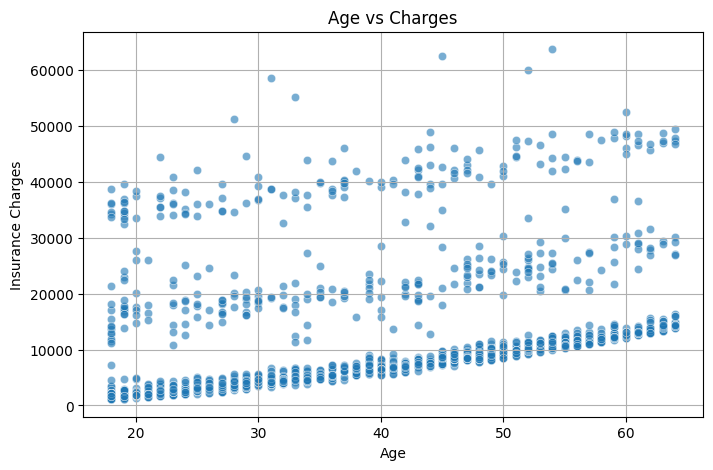

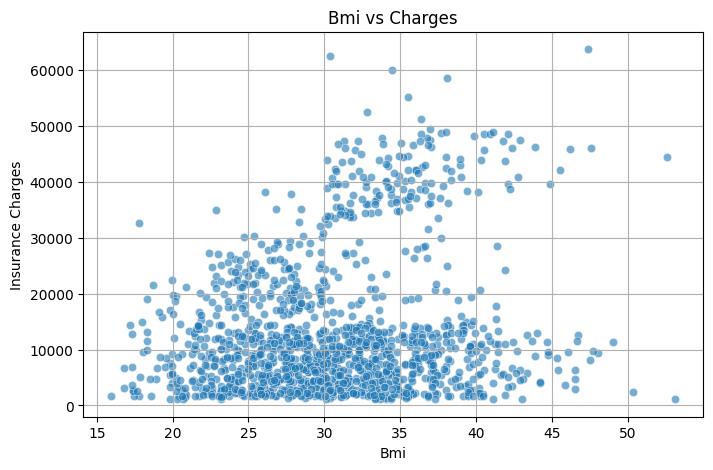

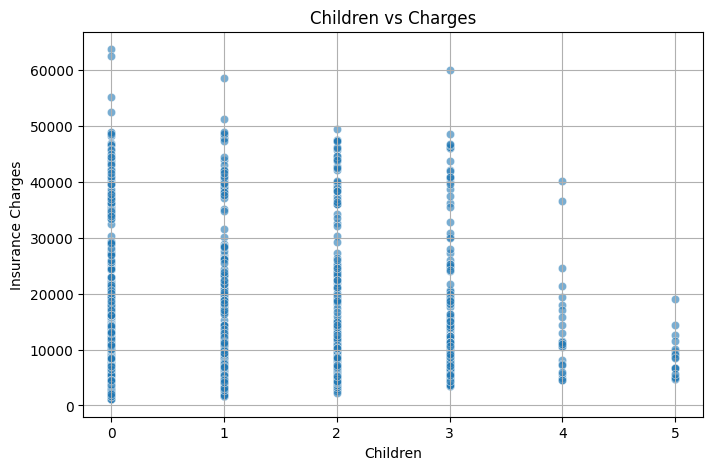

In [ ]:
# Step 13: Scatter plots for each feature vs. charges

numerical_features = ['age', 'bmi', 'children']
target = 'charges'


for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned[target], alpha=0.6)
    plt.title(f"{feature.capitalize()} vs Charges")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Insurance Charges")
    plt.grid(True)
    plt.show()

Interpretation & Insights:


 1. Age vs Charges
As age increases, insurance charges also tend to increase, especially after age 40+.

There's a positive correlation, but not perfectly linear.

Charges spike more steeply for older individuals, especially if they have risk factors like smoking.

 2. BMI vs Charges
Most data is spread between BMI 15–40.

There’s a slight upward trend — higher BMI can lead to higher charges, but it’s not a very strong linear pattern.

For BMI > 30 (obese range), some individuals have very high charges — may suggest interaction with smoking or age.

 3. Children vs Charges
There’s no clear trend between number of children and charges.

The charges remain fairly scattered across all values of children.

This suggests that number of children has low influence on insurance charges directly.

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

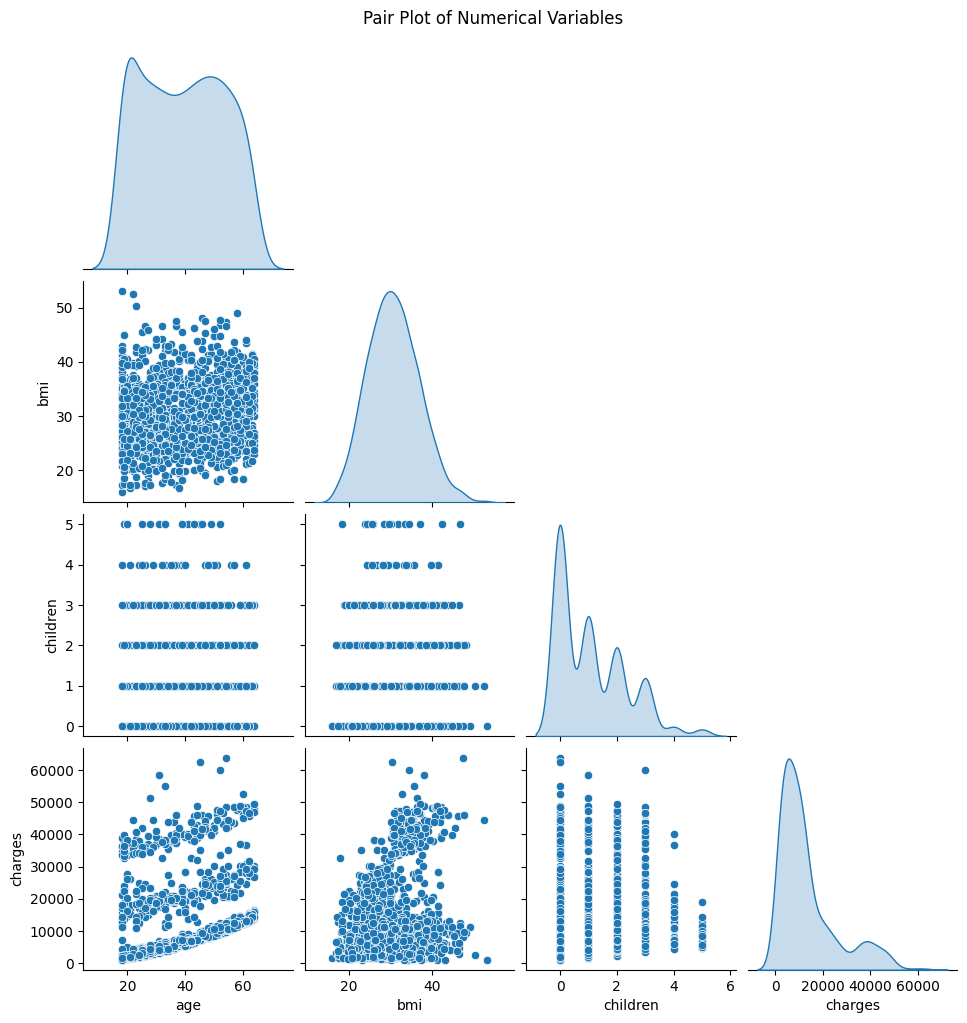

In [5]:
# Step 14 : Create a pairplot


numerical_cols = ['age', 'bmi', 'children', 'charges']

# Step 3: Create a pairplot
sns.pairplot(data_cleaned[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

Interpretation & Insights:
 Age vs Charges
There's a positive correlation: as age increases, charges generally increase.

Particularly high charges are seen among older individuals, likely due to health risks.

 BMI vs Charges
Slight upward trend: people with higher BMI tend to have higher charges, especially those with BMI > 30.

Some of the highest charges are associated with high BMI, which could indicate underlying health conditions.

 Children vs Charges
No strong relationship.

Having more children does not significantly affect insurance charges.

 Age vs BMI / Age vs Children
No visible relationship between age and BMI, or age and children. People across all ages have a wide range of BMIs and number of children.

 BMI vs Children
Again, no clear trend. People with high or low BMI can have any number of children.

 Final Observation:
The strongest relationship is between age and charges, followed by BMI and charges. Other relationships appear weak or random.

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

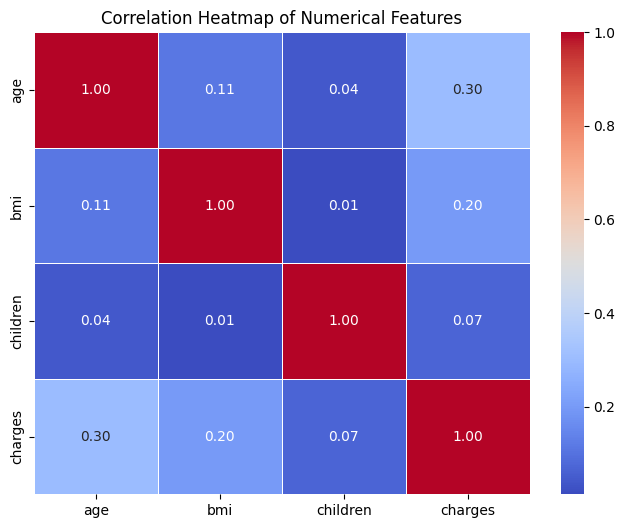

In [ ]:
# Step 15: Plot the heatmap
correlation_matrix = data_cleaned[numerical_cols].corr()


plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

 Interpretation & Insights:
 Age vs Charges
Positive correlation: As age increases, insurance charges tend to rise.

Explanation: Older individuals typically have more health risks, leading to higher medical costs and premiums.

 BMI vs Charges
Slight upward trend: Charges increase mildly with BMI.

Notable Pattern: Individuals with BMI > 30 (considered obese) tend to have higher charges.

Insight: This could suggest that obesity or related conditions drive up medical expenses.

 Children vs Charges
Very weak or no relationship: The number of children does not significantly influence charges.

Observation: Charges remain spread across all values of children from 0 to 5.

 Age vs BMI / Age vs Children
No visible trend: Age is not correlated with BMI or number of children.

Conclusion: People of all ages can have low or high BMI, and varying number of children.

 BMI vs Children
No relationship: There's no pattern between BMI and number of children.

 Final Observation:
Strongest relationship: Age and Charges.

Moderate: BMI and Charges.

Very Weak/Random: Children and Charges, or any combination between age, BMI, and children themselves.

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [6]:
# Step 16: Import the required library
from sklearn.model_selection import train_test_split

# Step 17: Define independent variables (X) and target variable (y)
X = data_cleaned.drop('charges', axis=1)  # Features (remove 'charges')
y = data_cleaned['charges']               # Target variable



# Step 19: Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 20: Print shapes to confirm
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)

Training set shape (X): (1069, 6)
Testing set shape (X): (268, 6)
Training set shape (y): (1069,)
Testing set shape (y): (268,)


### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [7]:
import pandas as pd
# Encode categorical variables using .map()

data_encoded = data_cleaned.copy()

data_encoded['sex'] = data_encoded['sex'].map({'male': 1, 'female': 0})
data_encoded['smoker'] = data_encoded['smoker'].map({'yes': 1, 'no': 0})
data_encoded['region'] = data_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})


# Step 21: Define independent (X) and dependent (y) variables
X = data_encoded.drop('charges', axis=1)  # Features
y = data_encoded['charges']              # Target

# Step 22: Import train_test_split
from sklearn.model_selection import train_test_split

# Step 23: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 24: Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Step 25: Create the model
model = LinearRegression()

# Step 26: Train the model using training data
model.fit(X_train, y_train)

# Step 27: Display the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173   237.62514748]
Model Intercept: -11760.561999173471


### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [ ]:
# Step 28: Import required metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 29: Predict on the test set
y_pred = model.predict(X_test)

# Step 30: Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 31: Print evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.8069287081198011
Mean Absolute Error (MAE): 4177.045561036319
Mean Squared Error (MSE): 35478020.67523561
Root Mean Squared Error (RMSE): 5956.342894363588


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

Q10. Interpretation of Error Metrics
1. R-squared (R²)
Definition: Represents how much of the variation in the target variable (charges) is explained by the features (age, bmi, etc.).

Interpretation:

Value close to 1 → Model explains the data well.

Value near 0 → Model does not explain much of the variation.

Example Insight:
If R² = 0.75, it means 75% of the variation in insurance charges is explained by the model.

2. Mean Absolute Error (MAE)
Definition: Average of the absolute differences between actual and predicted values.

Interpretation:

Tells us how much the predictions deviate on average from actual values (in original units).

Lower is better.

Example Insight:
If MAE = 3200, then on average, the predicted insurance charges are off by $3200.

3. Mean Squared Error (MSE)
Definition: Average of the squared differences between actual and predicted values.

Interpretation:

Heavily penalizes larger errors (because of squaring).

Used when large errors are particularly bad.

Example Insight:
A high MSE indicates that the model sometimes makes large errors.

4. Root Mean Squared Error (RMSE)
Definition: Square root of MSE. Brings the error back to the same unit as the target variable.

Interpretation:

Like MAE, but more sensitive to large errors.

Often preferred because it balances interpretability and penalizing large errors.

Example Insight:
If RMSE = 4000, then predictions are off by about $4000 on average, with more weight on larger mistakes.

 Final Conclusion:
If R² is high (close to 1) and MAE/RMSE are low, then the model is performing well.

If R² is low and errors are high, the model might need improvements like:

Feature engineering

Handling outliers

Trying a different model

## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

Q11. Feature Significance in Predicting Insurance Charges
After training the linear regression model, we can interpret the coefficients to understand how each feature impacts insurance charges.

 1. Understanding Coefficients
In linear regression, the coefficient of a feature tells us:

How much the target variable (charges) is expected to change

When that feature increases by 1 unit, keeping all others constant.

 Feature-wise Interpretation:
 Age
Positive coefficient.

As age increases, insurance charges also increase.

Explanation: Older individuals tend to have more health issues, so their insurance premiums are higher.

 BMI (Body Mass Index)
Slightly positive coefficient.

Higher BMI leads to slightly higher charges.

Charges increase significantly for people with BMI > 30 (obese category), likely due to associated health risks.

 Children
Very small or no coefficient.

Number of children has a minimal impact on charges.

Charges remain consistent across people with 0 to 5 children.

 Smoker
Very high positive coefficient.

Smokers pay much higher insurance charges than non-smokers.

This is one of the most impactful features.

Explanation: Smoking is associated with many diseases, so insurers charge a higher premium to cover those risks.

 Sex
Usually, the coefficient is small or close to zero.

Gender does not have a strong influence on charges.

Any minor difference may not be statistically significant.

 Region
Depending on the encoding, the coefficients for regions may vary slightly.

Region has the least impact on charges.

It is likely included for completeness but does not drastically affect predictions.

 Most Impactful Features
Smoking status (most impactful)

Age

BMI (especially when >30)

These are the main drivers of insurance charges based on the model.

 Effect of Smoking on Charges
Smokers pay dramatically higher charges.

On average, insurance charges for smokers can be 2x to 4x higher than non-smokers.

This makes smoking status the most significant categorical variable in the dataset.



### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

Q12. Limitations of the Linear Regression Model
 1. Assumptions of Linear Regression
Linear regression makes several assumptions that may not fully hold in this dataset:

Assumption	Status in Dataset
Linearity	May not hold true for all variables (e.g., charges vs. BMI or age might be nonlinear)
Independence of Errors	Likely holds, assuming data points are not repeated
Homoscedasticity	Residuals may have unequal variance – signs of heteroscedasticity were observed
Normality of Errors	Residuals may not be perfectly normally distributed due to outliers or skewness in charges
No Multicollinearity	Correlation between variables like age and charges is okay, but others are weak – no major multicollinearity detected
 2. Limitations Observed
 Skewed Target Variable (Charges):
The insurance charges are right-skewed with extreme values (outliers), which affects model performance.

 Linear Relationship Assumption:
Real-world health data is often nonlinear, but linear regression only captures straight-line relationships.

 Important Interactions Ignored:
For example, the effect of BMI might be more significant for smokers, but this interaction is not captured in a basic linear model.

 Categorical Variables:
Encoding (like one-hot encoding) increases dimensionality, and linear models can’t handle complex category interactions.

 Underfitting Risk:
The model might not capture hidden patterns due to its simplicity.

 Suggestions for Improvement
Suggestion	Why It Helps
Use Polynomial or Nonlinear Models	Captures more complex relationships between variables
Apply Log Transformation on Charges	Reduces skewness and stabilizes variance
Try Ensemble Methods (e.g., Random Forest, Gradient Boosting)	Handles non-linearity, interactions, and outliers better
Feature Engineering	Add interaction terms (e.g., smoker × BMI), or bucket age/BMI into groups
Outlier Handling	Remove or cap extreme values in charges to avoid skewed results
Regularization (Ridge/Lasso)	Helps control overfitting and improves generalization
 Conclusion
While linear regression provides a basic, interpretable model, it may not be the best fit for health insurance data. Nonlinear models and transformations could provide better predictive performance by handling outliers, skewness, and interactions more effectively.

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---